In [ ]:
#Etapa 1: Importação das bibliotecas

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import tensorflow as tf
# from tensorflow import keras
# from tensorflow.keras import layers

In [ ]:
tf.__version__

'2.15.0'

In [ ]:
#Etapa 2: Importação da base de dados

In [ ]:
#https://drive.google.com/file/d/1xunp3JmHnHZXakeQYv9t6vUFvMKMXPhX/view?pli=1
dados_path = '/content/Celsius-to-Fahrenheit.csv'
temperature_df = pd.read_csv(dados_path)

In [ ]:
temperature_df

,Celsius,Fahrenheit
0,-50,-58.0
1,-40,-40.0
2,-30,-22.0
3,-20,-4.0
4,-10,14.0
5,-9,15.8
6,-8,17.6
7,-7,19.4
8,-6,21.2
9,-5,23.0


In [ ]:
temperature_df.head() #exibe os dados do começo

,Celsius,Fahrenheit
0,-50,-58.0
1,-40,-40.0
2,-30,-22.0
3,-20,-4.0
4,-10,14.0


In [ ]:
temperature_df.tail() #exibe os dados do final

,Celsius,Fahrenheit
25,20,68.0
26,30,86.0
27,40,104.0
28,50,122.0
29,60,140.0


In [ ]:
temperature_df.info() #exibe os dados estatísticos dos dados

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Celsius     30 non-null     int64  
 1   Fahrenheit  30 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 608.0 bytes


In [ ]:
temperature_df.describe() #exibe os dados estatísticos dos dados

,Celsius,Fahrenheit
count,30.000000,30.000000
mean,2.000000,35.600000
std,22.780815,41.005466
min,-50.000000,-58.000000
25%,-6.750000,19.850000
50%,0.500000,32.900000
75%,7.750000,45.950000
max,60.000000,140.000000


In [ ]:
# Etapa 3: Visualização da base de dados

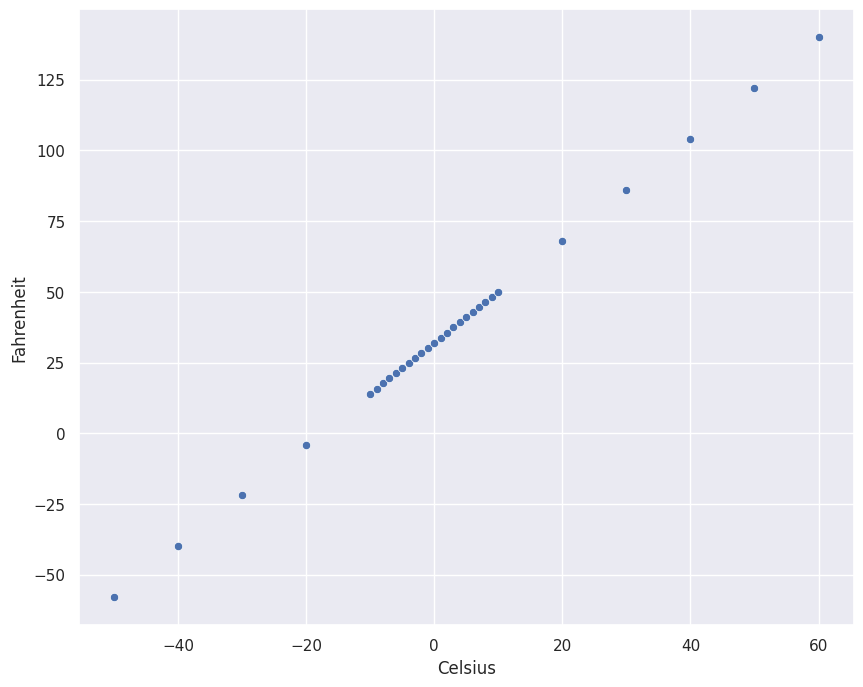

In [ ]:
sns.scatterplot(x=temperature_df['Celsius'], y=temperature_df['Fahrenheit']);
# sns.scatterplot([1,0], [2,0])
# data = np.concatenate([temperature_df['Celsius'], temperature_df['Fahrenheit']], axis=1)
# sns.scatterplot(data[:, 0], data[:, 1]);
# sns.scatterplot(x=temperature_df['Celsius'], y=temperature_df['Fahrenheit']);

In [ ]:
# Etapa 4: Configuração da base de dados de treinamento

In [ ]:
X_train = temperature_df['Celsius']
y_train = temperature_df['Fahrenheit']

In [ ]:
X_train.shape

(30,)

In [ ]:
y_train.shape

(30,)

In [ ]:
# Etapa 5: Construção e treinamento do modelo

In [ ]:
model = tf.keras.Sequential()

In [ ]:
model.add(tf.keras.layers.Dense(units=1, input_shape=[1]))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2 (8.00 Byte)
Trainable params: 2 (8.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1.0), loss='mean_squared_error')

In [ ]:
epochs_hist = model.fit(X_train, y_train, epochs=1000, verbose=1)

Epoch 1/1000
1/1 [==============================] - 0s 17ms/step - loss: 6.3665e-13
Epoch 2/1000
1/1 [==============================] - 0s 14ms/step - loss: 6.3665e-13
Epoch 3/1000
1/1 [==============================] - 0s 18ms/step - loss: 6.3665e-13
Epoch 4/1000
1/1 [==============================] - 0s 12ms/step - loss: 6.3665e-13
Epoch 5/1000
1/1 [==============================] - 0s 13ms/step - loss: 6.3665e-13
Epoch 6/1000
1/1 [==============================] - 0s 14ms/step - loss: 6.3665e-13
Epoch 7/1000
1/1 [==============================] - 0s 15ms/step - loss: 6.3665e-13
Epoch 8/1000
1/1 [==============================] - 0s 16ms/step - loss: 6.3665e-13
Epoch 9/1000
1/1 [==============================] - 0s 13ms/step - loss: 6.3665e-13
Epoch 10/1000
1/1 [==============================] - 0s 13ms/step - loss: 6.3665e-13
Epoch 11/1000
1/1 [==============================] - 0s 13ms/step - loss: 6.3665e-13
Epoch 12/1000
1/1 [==============================] - 0s 13ms/step - loss: 

In [ ]:
# Etapa 6: Avaliação do Modelo

In [ ]:
epochs_hist.history.keys()

dict_keys(['loss'])

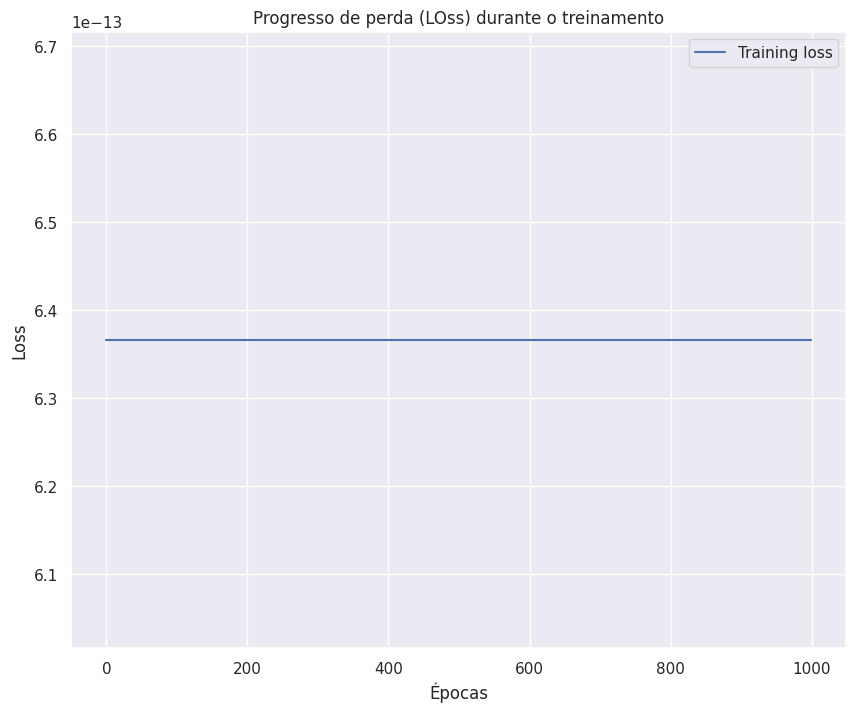

In [ ]:
plt.plot(epochs_hist.history['loss'])
plt.title('Progresso de perda (LOss) durante o treinamento')
plt.xlabel('Épocas')
plt.ylabel('Loss')
plt.legend(['Training loss'])
plt.show()

In [ ]:
model.get_weights()

[array([[1.8]], dtype=float32), array([32.], dtype=float32)]

In [ ]:
temp_c = 35

In [ ]:
temp_f = model.predict([temp_c])

1/1 [==============================] - 0s 63ms/step


In [ ]:
print(f'A temperatura em Fahrenheit é {temp_f[0][0]:.2f}')

A temperatura em Fahrenheit é 95.00
